In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import yfinance as yf 
import datetime

In [59]:
start = '2012-01-01'
# end = '2025-2-22'
today = datetime.date.today().strftime("%Y-%m-%d")
stock = 'GOOG'
data = yf.download(stock,start,today)


[*********************100%***********************]  1 of 1 completed


In [61]:
data.reset_index(inplace=True)

In [63]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
1,2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2,2012-01-05,16.354961,16.478056,16.285969,16.432392,131808205
3,2012-01-06,16.131853,16.379531,16.126144,16.358435,108119746
4,2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981
...,...,...,...,...,...,...
3302,2025-02-20,186.639999,187.119995,184.600006,186.500000,12063800
3303,2025-02-21,181.580002,187.470001,181.130005,187.289993,19520800
3304,2025-02-24,181.190002,185.089996,180.880005,183.800003,18734000


In [65]:
ma_100_days = data.Close.rolling(100).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

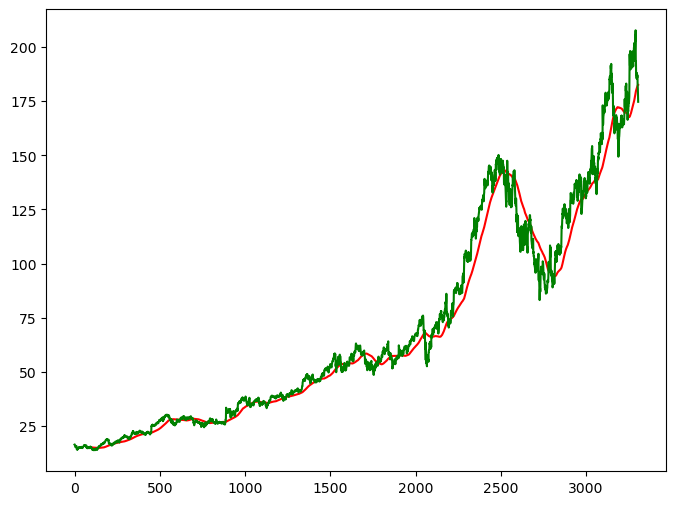

In [67]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show

In [69]:
ma_200_days = data.Close.rolling(200).mean()

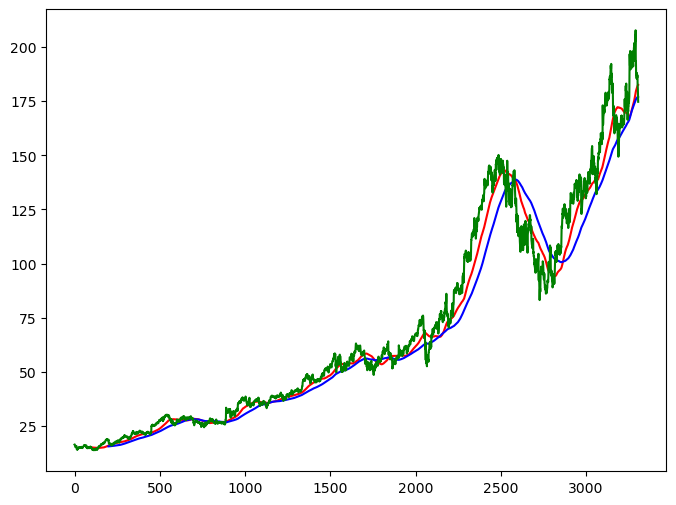

In [71]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [73]:
data.dropna(inplace=True)


In [75]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test =  pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])


In [77]:
data_train.shape[0]

2645

In [79]:
data_test.shape[0]

662

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [83]:
data_train_scale = scaler.fit_transform(data_train)

In [85]:
x=[]
y=[]
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [88]:
from keras.layers  import Dense, Dropout , LSTM 
from keras.models import Sequential


In [90]:
x,y = np.array(x),np.array(y)

In [92]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences= True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True ))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True ))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))



/home/phung/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [94]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [96]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - loss: 0.0511
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 0.0056
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0046
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 0.0040
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 152ms/step - loss: 0.0043
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 144ms/step - loss: 0.0043
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 225ms/step - loss: 0.0042
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 251ms/step - loss: 0.0036
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 15s 189ms/step - loss: 0.0040
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step - loss: 0.0033
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - loss: 0.0044
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 157ms/step - loss: 0.0031
Epoch 13/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 146ms/step - loss: 0.0029
Epoch 14/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 168ms/step - loss: 0.0030
Epoch 15/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step

In [98]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [100]:
pas_100_days = data_train.tail(100)

In [102]:
data_test = pd.concat([pas_100_days,data_test],ignore_index=True)

In [104]:
data_test_scale = scaler.transform(data_test)

In [106]:
x=[]
y=[]
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x,y = np.array(x),np.array(y)

In [108]:
y_predict = model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


In [110]:
scale = 1/scaler.scale_

In [112]:
y_predict= y_predict*scale

In [114]:
y = y*scale

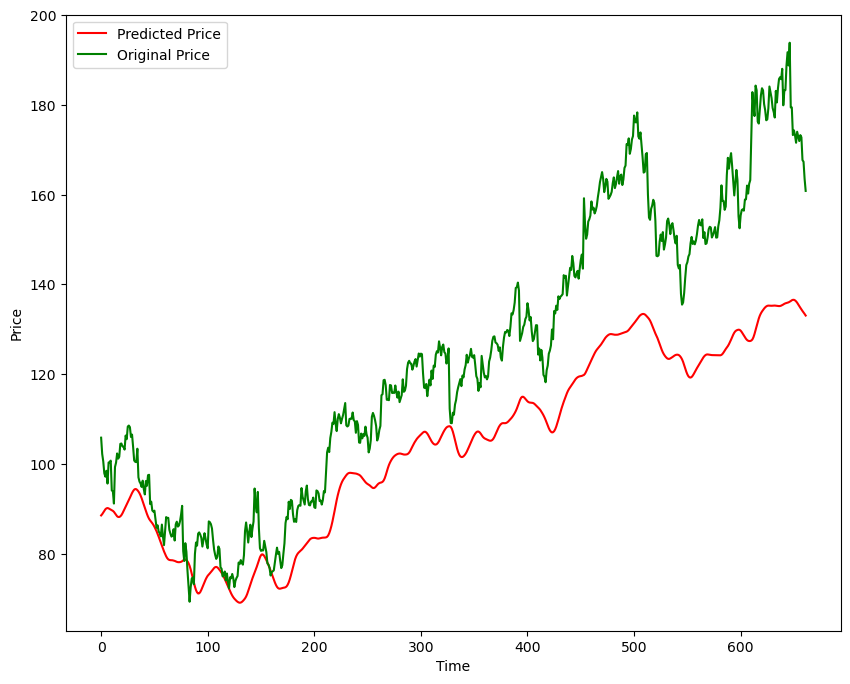

In [116]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label = 'Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/home/phung/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

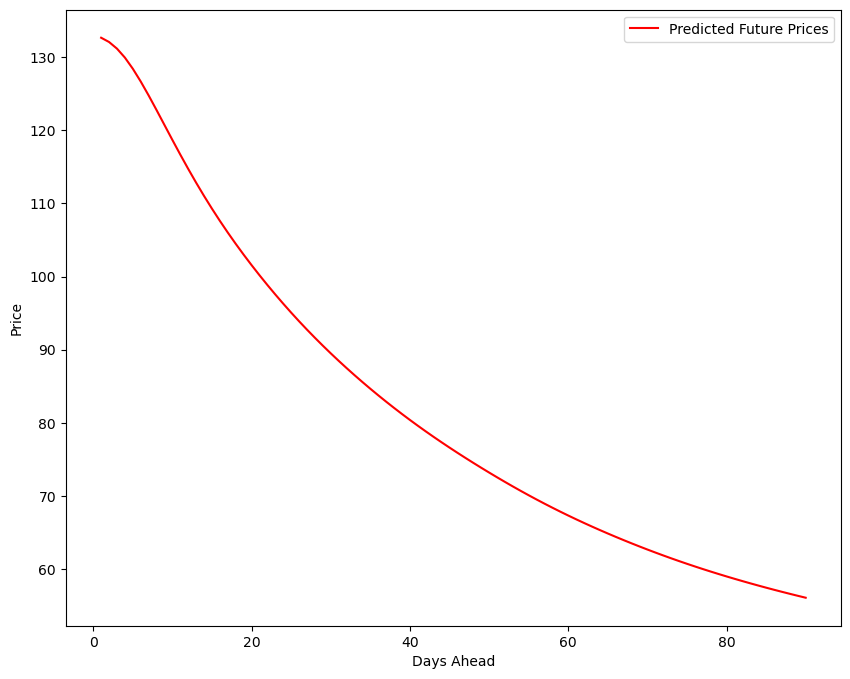

In [118]:
future_days = 90  # Số ngày dự đoán trong tương lai

# Lấy 100 ngày cuối cùng từ dữ liệu thực tế
past_100_days = data.Close.tail(100).values.reshape(-1, 1)
past_100_days_scaled = scaler.transform(past_100_days)

# Tạo danh sách chứa dữ liệu đầu vào cho dự đoán
future_input = list(past_100_days_scaled)

future_predictions = []

for i in range(future_days):
    # Định dạng dữ liệu đầu vào cho mô hình
    x_future = np.array(future_input[-100:]).reshape(1, 100, 1)
    
    # Dự đoán ngày tiếp theo
    predicted_value = model.predict(x_future)
    
    # Chuyển giá trị dự đoán về giá trị thực
    predicted_price = predicted_value * (1 / scaler.scale_)
    
    # Lưu dự đoán
    future_predictions.append(predicted_price[0][0])
    
    # Cập nhật danh sách đầu vào (loại bỏ phần tử đầu, thêm phần tử mới)
    future_input.append(predicted_value[0])

# Vẽ biểu đồ
plt.figure(figsize=(10,8))
plt.plot(range(1, future_days+1), future_predictions, 'r', label='Predicted Future Prices')
plt.xlabel('Days Ahead')
plt.ylabel('Price')
plt.legend()
plt.show()


In [122]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Số ngày dự đoán
future_days_3m = 90
future_days_6m = 180

# Lấy 100 ngày cuối cùng từ dữ liệu thực tế
past_100_days = data.Close.tail(100).values.reshape(-1, 1)
past_100_days_scaled = scaler.transform(past_100_days)

# Dự đoán 3 tháng
future_input_3m = list(past_100_days_scaled)
future_predictions_3m = []

for i in range(future_days_3m):
    x_future = np.array(future_input_3m[-100:]).reshape(1, 100, 1)
    predicted_value = model.predict(x_future)
    predicted_price = predicted_value * (1 / scaler.scale_)
    future_predictions_3m.append(predicted_price[0][0])
    future_input_3m.append(predicted_value[0])

# Dự đoán 6 tháng
future_input_6m = list(past_100_days_scaled)
future_predictions_6m = []

for i in range(future_days_6m):
    x_future = np.array(future_input_6m[-100:]).reshape(1, 100, 1)
    predicted_value = model.predict(x_future)
    predicted_price = predicted_value * (1 / scaler.scale_)
    future_predictions_6m.append(predicted_price[0][0])
    future_input_6m.append(predicted_value[0])

# Tạo danh sách ngày tương lai
start_date = datetime.date.today()
future_dates_3m = [start_date + datetime.timedelta(days=i) for i in range(1, future_days_3m + 1)]
future_dates_6m = [start_date + datetime.timedelta(days=i) for i in range(1, future_days_6m + 1)]




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/home/phung/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

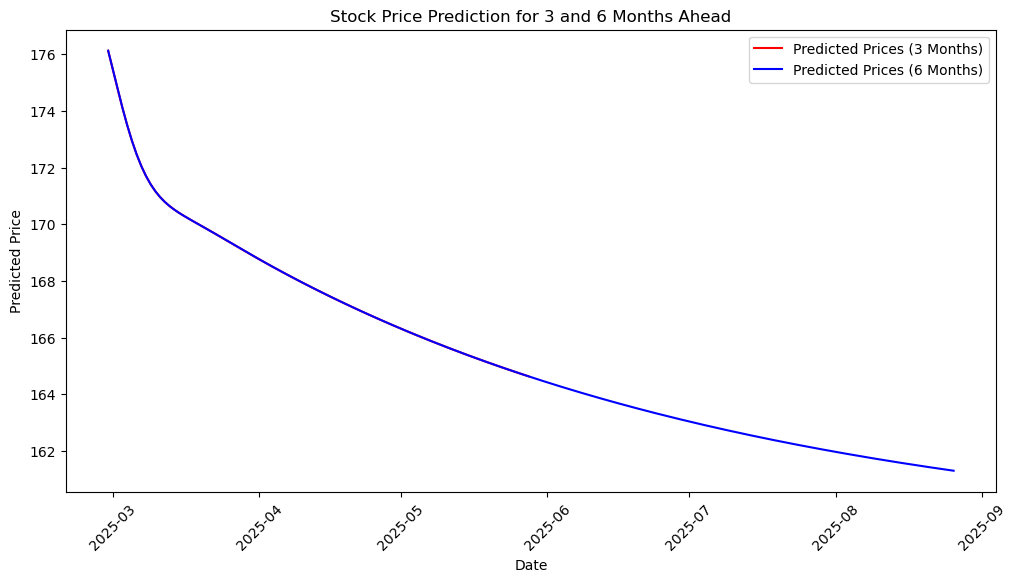

In [120]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(future_dates_3m, future_predictions_3m, 'r', label='Predicted Prices (3 Months)')
plt.plot(future_dates_6m, future_predictions_6m, 'b', label='Predicted Prices (6 Months)')
plt.xlabel('Date')
plt.ylabel('Predicted Price')
plt.legend()
plt.xticks(rotation=45)
plt.title('Stock Price Prediction for 3 and 6 Months Ahead')
plt.show()

In [ ]:
# model.save('Stock Predictions Model.keras')